In [1]:
import numpy as np


In [2]:
x=np.load("Without_jacket.npy")
    
x2=np.load('With_jacket.npy')

In [3]:
#new without__jacket
new_wo_j=[[None]*160000]*27
new_w_j=[[None]*160000]*27

def convert(source,dest,label):
    #tmp placeholder
    co= [[None]*400]*200
    cross= [[None]*400]*200

    for i in range(len(source)):
        x_1=source[i][:200000]
        x_2=source[i][200000:400000]
        x_1=x_1.reshape(200,1000)
        x_2=x_2.reshape(200,1000)

    #     converts (200,1000-)->(200,1024)
        for j in range(200):
            fft_result_co=np.abs(np.fft.fft(x_1[j],1024))
            fft_result_cross=np.abs(np.fft.fft(x_2[j],1024))
            first200 = fft_result_co[:200]
            last200=fft_result_co[824:]
            co[j]=np.concatenate([first200,last200])
            first200 = fft_result_cross[:200]
            last200=fft_result_cross[824:]
            cross[j]=np.concatenate([first200,last200])

    #     at this point tmp placeholders have trimmed fft data
    #     print np.array(co).shape
    #     print np.array(cross).shape
       
    
        co=np.array(co).reshape(80000,)
        cross=np.array(cross).reshape(80000,)
        dest[i]=list(co)+list(cross)+[label]
    #     print co.shape
    #     print cross.shape
        co= [[None]*400]*200
        cross= [[None]*400]*200
    
convert(x,new_wo_j,0)
convert(x2,new_w_j,1)



    
        
        
        

In [4]:
print np.array(new_wo_j).shape
print np.array(new_w_j).shape

(27, 160001)
(27, 160001)


In [19]:
x = new_wo_j+new_w_j
print np.array(x).shape
shuffle(x)
print np.array(x)[:,-1]
print np.array(x).shape
np.save('alldata_new.npy',np.array(x))

(54, 160001)
[ 0.  0.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.
  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.
  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
(54, 160001)


In [85]:
#concatenating with jacket and without jacket. shuffling

In [16]:
# print np.array(new_wo_j+new_w_j).shape
from random import shuffle
# # alldata=new_wo_j+new_w_j
# # shuffle(alldata)
# print np.array(new_wo_j+new_w_j).shape
# print new_wo_j+new_w_j[:1]
# x = np.load('alldata.npy')
# print x[5]

In [6]:
np.save('alldata.npy',np.array(new_wo_j+new_w_j))

In [86]:
#saving as CSV file

In [87]:
import pandas as pd
df= pd.DataFrame(alldata)
df.to_csv('alldata_new.csv')

In [89]:
#training script


In [ ]:
###########################
#loading libs

from keras import optimizers
from keras.models import Sequential
from keras.layers import TimeDistributed,Dense, Dropout, Activation,LSTM,Bidirectional,GaussianNoise
from keras.optimizers import SGD
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing import sequence
#uncomment these if you get tensorflow warnings
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
from keras.callbacks import TensorBoard
from time import time
import scipy.io as sio
from keras.regularizers import l2
from keras import regularizers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [ ]:
x1=np.load('home/hammad/data/alldata.npy')
train = x1[:,:160000]
trainy = x1[:,-1]

print trainy[:10]

test = train[-16:,:]
testy = trainy[-16:,:]

train=train[:-16]
trainy=trainy[:-16]

trainy = to_categorical(trainy, num_classes = 2)
testy = to_categorical(testy, num_classes = 2)
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

train = np.array(train)
test = np.array(test)
print 'train',train.shape
print 'trainy',trainy.shape
print 'test',test.shape
print 'testy',testy.shape


print 'train'
for i in range(10):
	print train[i]
print 'test'
for i in range(10):
	print test[i]


In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=600000))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(2, activation='softmax'))
#model.add(Dense(2,W_regularizer=l2(0.01)))

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# model.compile(loss='hinge',
#               optimizer='adadelta',
#               metrics=['accuracy'])


hist=model.fit(train,trainy,verbose = 1,validation_split=0.3,epochs=50,callbacks=[tensorboard])

score = model.evaluate(test, testy)
model.save("vestdetect_model")
print score

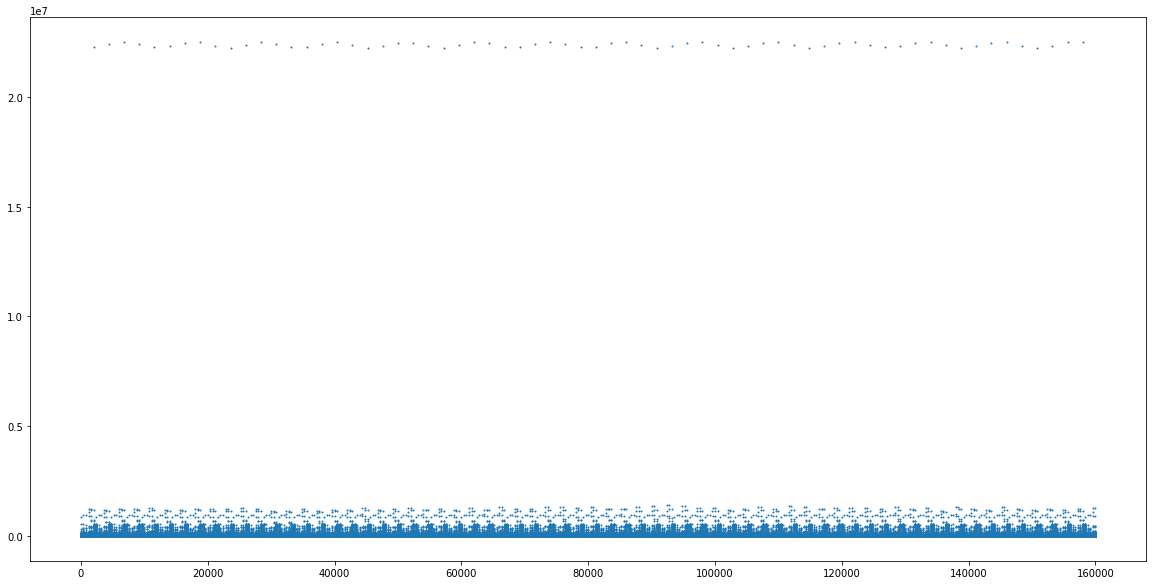

In [74]:
plt.scatter([i for i in range(160000)],new_w_j[0],s=1)
plt.show()

In [4]:
print x.shape

(27, 600001)


In [8]:
x_1=x[0][:200000]
x_2=x[0][200000:400000]

x_1=x_1.reshape(200,1000)
x_2=x_2.reshape(200,1000)
print x_1.shape
print x_2.shape



(200, 1000)
(200, 1000)


In [20]:
plt.scatter([i for i in range(1024)],np.abs(np.fft.fft(x_1[0],1024)),s=10)
plt.show()

NameError: name 'plt' is not defined

In [9]:
import matplotlib.pyplot as plt
import scipy.fftpack

In [69]:
y= [[None]*1024]*27
y2=[[None]*1024]*27
print np.array(y).shape
print np.array(y2).shape

(27, 1024)
(27, 1024)


In [172]:
for i in range(27):
    y[i]= np.abs(np.fft.fft(x[i],1024))
    y2[i]= np.abs(np.fft.fft(x2[i],1024))
print y[i].shape
print y2[i].shape

(1024,)
(1024,)


In [10]:
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
print "New size:", fig_size

Current size: [6.0, 4.0]
New size: [20, 10]


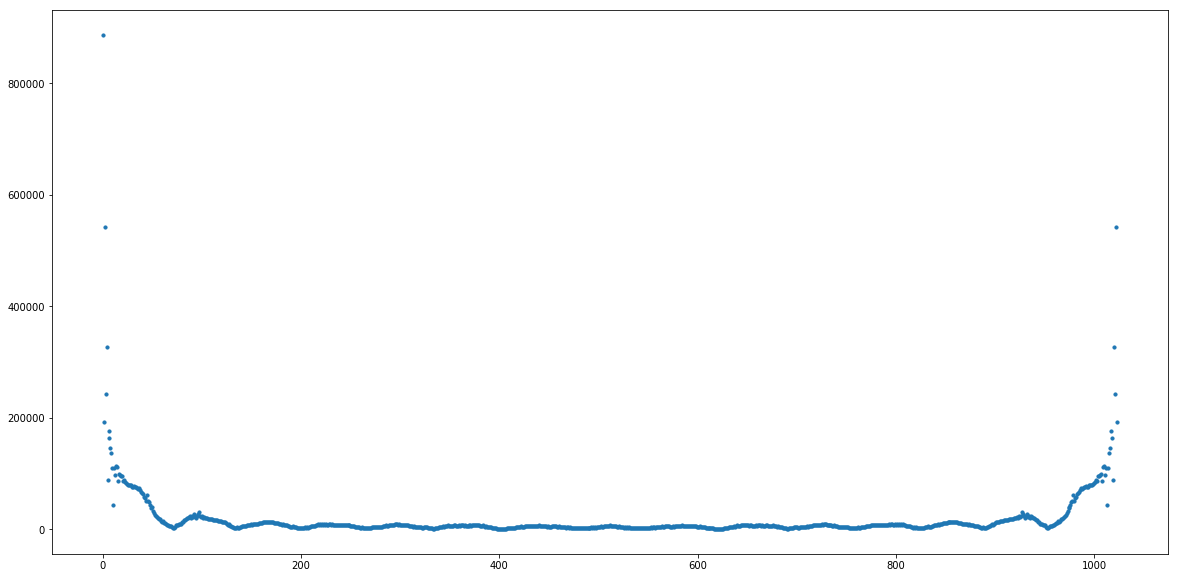

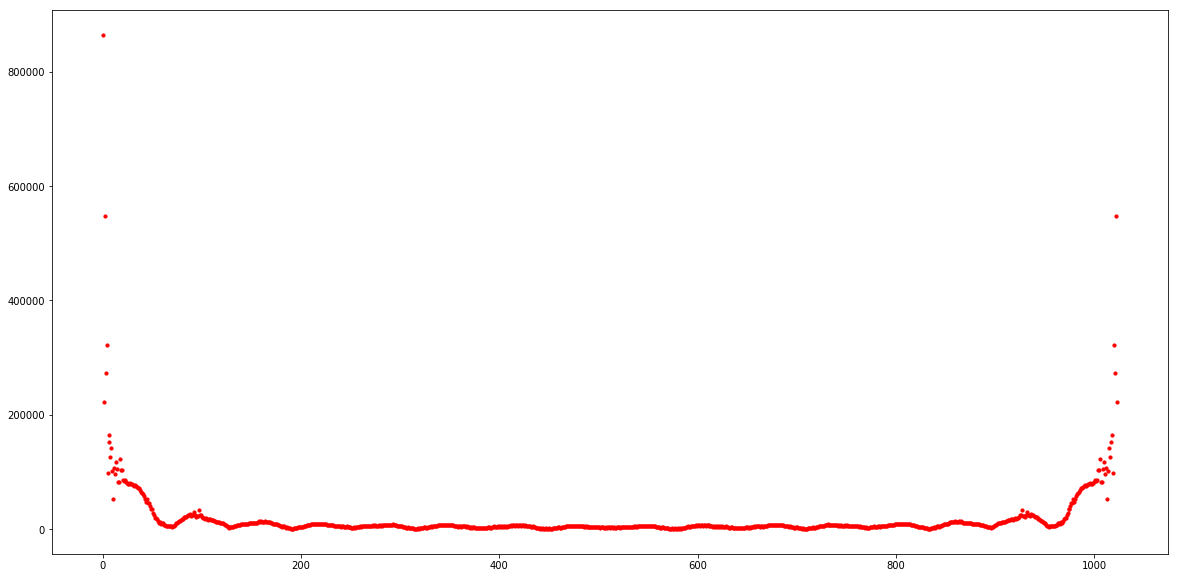

In [173]:
plt.scatter([i for i in range(1024)],y[0],s=10)
plt.show()
plt.scatter([i for i in range(1024)],y2[0],s=10,c='red')
plt.show()


In [ ]:
#creating placeholders

In [174]:
new_without_jacket_data=[[None]*400]*27
print 'without',np.array(new_without_jacket_data).shape
new_with_jacket_data=[[None]*401]*27
print 'with',np.array(new_with_jacket_data).shape

without (27, 400)
with (27, 401)


In [ ]:
#trimming

In [175]:
temp = np.array(y)[:,:200]
last200=np.array(y)[:,824:]
for i in range(27):
    #print i.shape
    new_without_jacket_data[i]=np.concatenate([temp[i],last200[i],[0]])
#print new_without_jacket_data[0]    
new_without_jacket_data= np.array(new_without_jacket_data)
print new_without_jacket_data.shape




(27, 401)


In [176]:
temp = np.array(y2)[:,:200]
last200=np.array(y2)[:,824:]
for i in range(27):
    #print i.shape
    new_with_jacket_data[i]=np.concatenate([temp[i],last200[i],[1]])
    
new_with_jacket_data= np.array(new_with_jacket_data)
print new_with_jacket_data.shape


(27, 401)


In [155]:
#concatinating and shuffling
type(new_without_jacket_data)

numpy.ndarray

In [3]:
#alldata=np.concatenate([new_with_jacket_data,new_without_jacket_data])
#print alldata.shape
#np.random.shuffle(alldata)
#print alldata[0]

In [165]:
array =np.asarray(alldata)
np.savetxt('alldata.csv',array,delimiter=',')

In [178]:
import pandas as pd 
df = pd.DataFrame(alldata)
df.to_csv("alldata.csv")

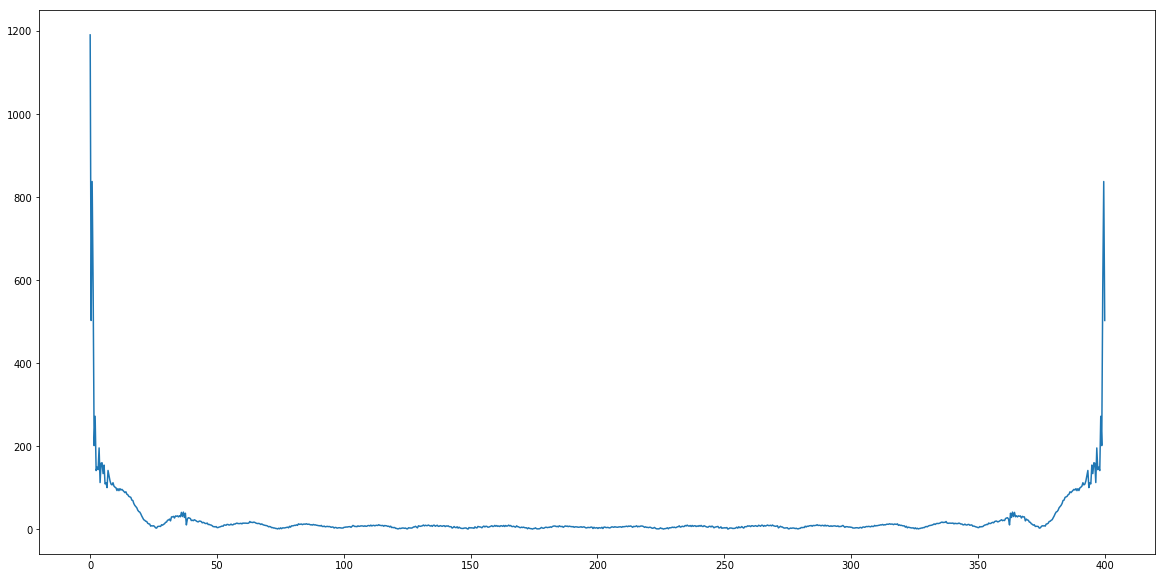

In [163]:

N = 1024

# sample spacing
T = 1.0 / 800.0


xf = np.linspace(0.0, 1.0/(2.0*T), N)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(y[9][:N]))
plt.show()

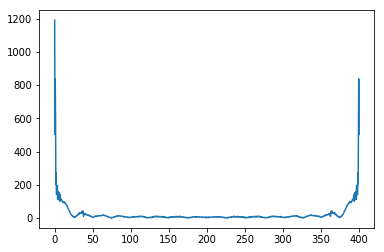

In [98]:
N = 1024

# sample spacing
T = 1.0 / 800.0


xf = np.linspace(0.0, 1.0/(2.0*T), N)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(y[9][:N]))
# plt.figure(figsize=(40,10))
plt.show()

In [56]:
plt.plot(y[0], sp.real,y[0], sp.imag)


In [83]:
plt.show()

RAW TIME DOMAIN DATA


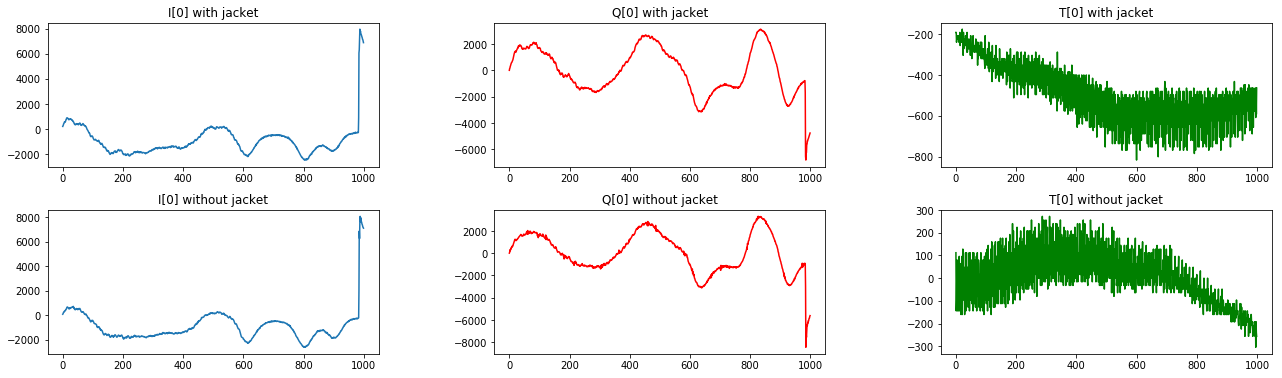

AFTER AVERAGING


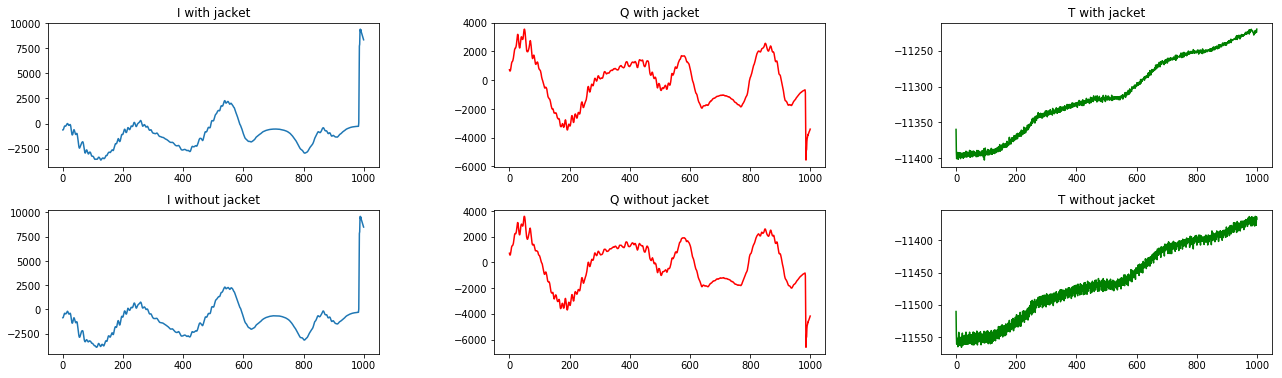

AFTER SUBTRACTING


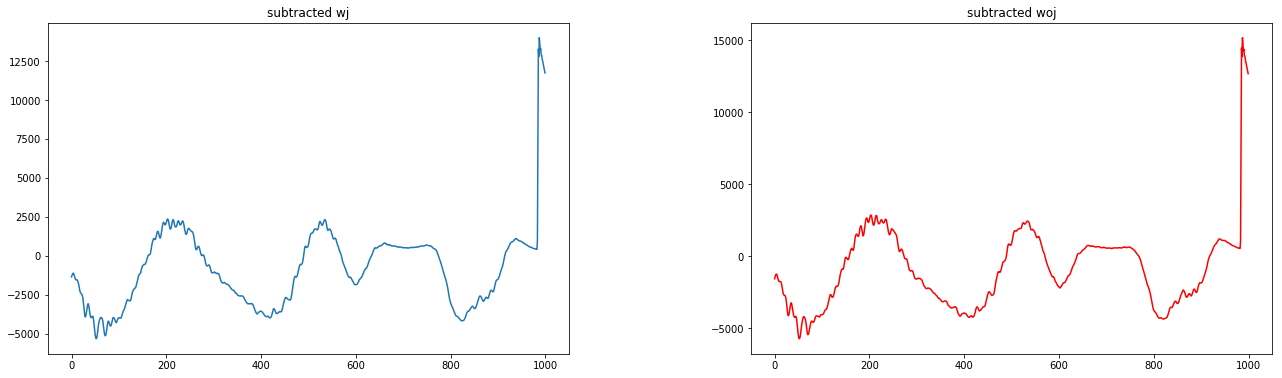

AFTER FFT


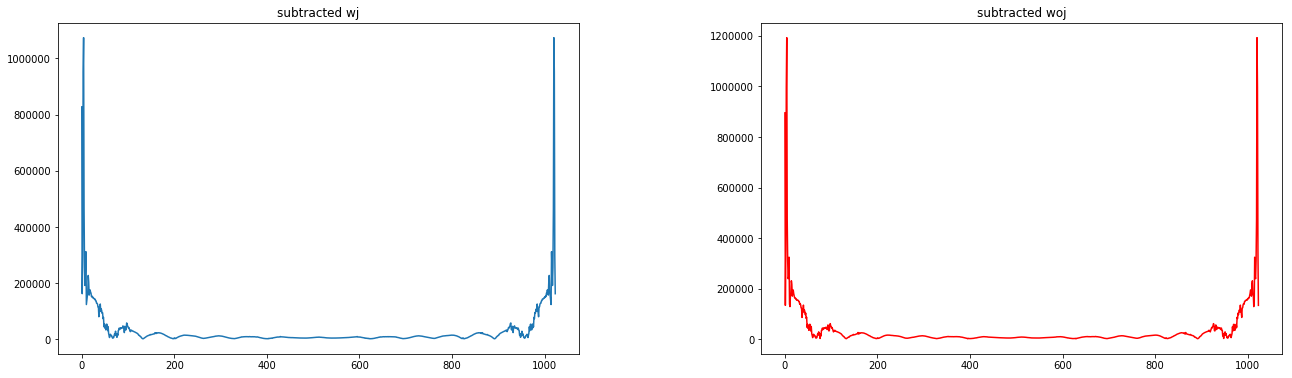

In [17]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

i = 'hassan'
path= '/home/t-rex/Desktop/FYP/All39Files/'

ifile_wj=path+i+'_wj/I.mat'
qfile_wj=path+i+'_wj/Q.mat'
tfile_wj=path+i+'_wj/T.mat'

ifile_woj=path+i+'_woj/I.mat'
qfile_woj=path+i+'_woj/Q.mat'
tfile_woj=path+i+'_woj/T.mat'

I_wj= sio.loadmat(ifile_wj)
Q_wj= sio.loadmat(qfile_wj)
T_wj= sio.loadmat(tfile_wj)

I_woj= sio.loadmat(ifile_woj)
Q_woj= sio.loadmat(qfile_woj)
T_woj= sio.loadmat(tfile_woj)

I_wj=I_wj['DataI']
Q_wj=Q_wj['DataQ']
T_wj=T_wj['DataT']

I_woj=I_woj['DataI']
Q_woj=Q_woj['DataQ']
T_woj=T_woj['DataT']


print 'RAW TIME DOMAIN DATA' 
plt.figure(figsize=(20,5))
plt.subplot(231)
plt.plot([i for i in range(1000)],I_wj[0])
plt.title('I[0] with jacket')
plt.subplot(232)
plt.plot([i for i in range(1000)],Q_wj[0],color='r')
plt.title('Q[0] with jacket')
plt.subplot(233)
plt.plot([i for i in range(1000)],T_wj[0],color='g')
plt.title('T[0] with jacket')


plt.subplot(234)
plt.plot([i for i in range(1000)],I_woj[0])
plt.title('I[0] without jacket')
plt.subplot(235)
plt.plot([i for i in range(1000)],Q_woj[0],color='r')
plt.title('Q[0] without jacket')
plt.subplot(236)
plt.plot([i for i in range(1000)],T_woj[0],color='g')
plt.title('T[0] without jacket')

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()

print 'AFTER AVERAGING'
averagedI=np.mean(I_wj,axis=0)
averagedQ=np.mean(Q_wj,axis=0)
averagedT=np.mean(T_wj,axis=0)

averagedI_woj=np.mean(I_woj,axis=0)
averagedQ_woj=np.mean(Q_woj,axis=0)
averagedT_woj=np.mean(T_woj,axis=0)


plt.figure(figsize=(20,5))
plt.subplot(231)
plt.plot([i for i in range(1000)],averagedI)
plt.title('I with jacket')
plt.subplot(232)
plt.plot([i for i in range(1000)],averagedQ,color='r')
plt.title('Q with jacket')
plt.subplot(233)
plt.plot([i for i in range(1000)],averagedT,color='g')
plt.title('T with jacket')


plt.subplot(234)
plt.plot([i for i in range(1000)],averagedI_woj)
plt.title('I without jacket')
plt.subplot(235)
plt.plot([i for i in range(1000)],averagedQ_woj,color='r')
plt.title('Q without jacket')
plt.subplot(236)
plt.plot([i for i in range(1000)],averagedT_woj,color='g')
plt.title('T without jacket')

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()

print "AFTER SUBTRACTING"
subtracted=np.subtract(averagedI,averagedQ)
subtracted_woj=np.subtract(averagedI_woj,averagedQ_woj)
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot([i for i in range(1000)],subtracted)
plt.title('subtracted wj')
plt.subplot(122)
plt.plot([i for i in range(1000)],subtracted_woj,color='r')
plt.title('subtracted woj')
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()

print "AFTER FFT"
fft=np.abs(np.fft.fft(subtracted,1024))
fft_woj=np.abs(np.fft.fft(subtracted_woj,1024))
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot([i for i in range(1024)],fft)
plt.title('subtracted wj')
plt.subplot(122)
plt.plot([i for i in range(1024)],fft_woj,color='r')
plt.title('subtracted woj')
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()


17th feb


In [ ]:
#reads .mat files, averages, calculates ratio and saves as .csv for weka
import scipy.io as sio
import numpy
Subjects = ['hassan','adeel1','Ameen1','amjad1','Arqam1','Asif1',\
            'Azaman1','bhatti1','faheem1','furkan1','george1','gohas1'\
            ,'grizwan1','hassan1','kashif1','naseem1','naveed1','peter1'\
            ,'rafiq1','rizwan1','sajjad1','sakim1','tariq1','umer1',\
            'usman1','waqas1','waqash1']
path= '/home/t-rex/Desktop/FYP/All39Files/'
wj=0
data =numpy.zeros(shape=(54,1025))
label =numpy.zeros(shape=(55,1))

#data[0,:]=[i for i in range(1001)]
#data[0,-1]=5555
counter=0
for wj in [0,1]:


    for i in Subjects:
        if wj:
            ifile=path+i+'_wj/I.mat'
            qfile=path+i+'_wj/Q.mat'
        else:
            ifile=path+i+'_woj/I.mat'
            qfile=path+i+'_woj/Q.mat'
        I= sio.loadmat(ifile)
        Q= sio.loadmat(qfile)
        
        I=I['DataI']
        Q=Q['DataQ']

        print 'counter value=',counter
        print 'I',I.shape 
        print 'Q',Q.shape 

        averagedI=np.mean(I,axis=0)
        averagedQ=np.mean(Q,axis=0)
       
        print 'after averaging' 
        print 'I',averagedI.shape 
        print 'Q',averagedQ.shape 
        
#       fft_I=np.abs(np.fft.fft(averagedI,1024))
#       fft_q=np.abs(np.fft.fft(averagedQ,1024))
        
        subtracted=np.subtract(averagedI,averagedQ)
        #subtracted=np.subtract(fft_I,fft_q)
        
        subtracted=np.abs(np.fft.fft(subtracted,1024))
        
        print 'after subtracting'
        print 'subtracted',subtracted.shape 
        data[counter,:-1]=subtracted
        
        if wj:
            label[counter]=1
            data[counter,-1]=1
        else:
            label[counter]=0
            data[counter,-1]=0
        counter+=1

        #end of loop

print 'total data size',data.shape
print 'total label size',label.shape

np.random.shuffle(data)
data[0,:]=[i for i in range(1025)]
data[0,-1]=5555

numpy.savetxt("averaged_ratio_fft.csv",data, delimiter=",")


In [32]:
print data[0]

[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   9.98000000e+02
   9.99000000e+02   5.55500000e+03]


# time domain data 

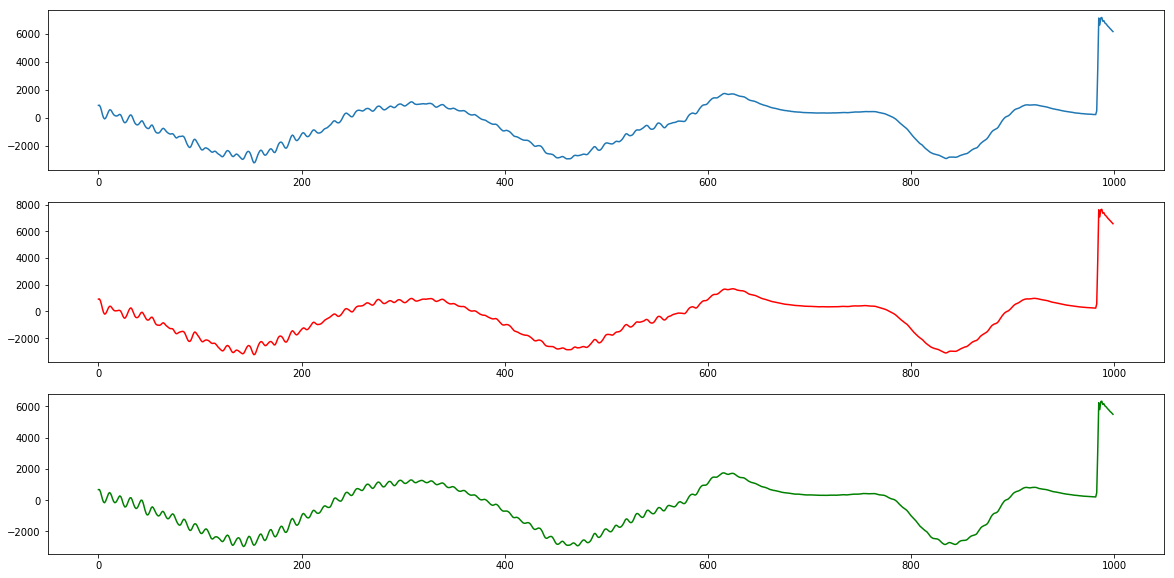

In [61]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot([i for i in range(1000)], data[1,:-1])
#plt.axis([0, 6, 0, 20])
plt.subplot(312)
plt.plot([i for i in range(1000)], data[2,:-1],color='r')
plt.subplot(313)
plt.plot([i for i in range(1000)], data[3,:-1],color='g')
plt.show()

# freq domain (fft before ratio)

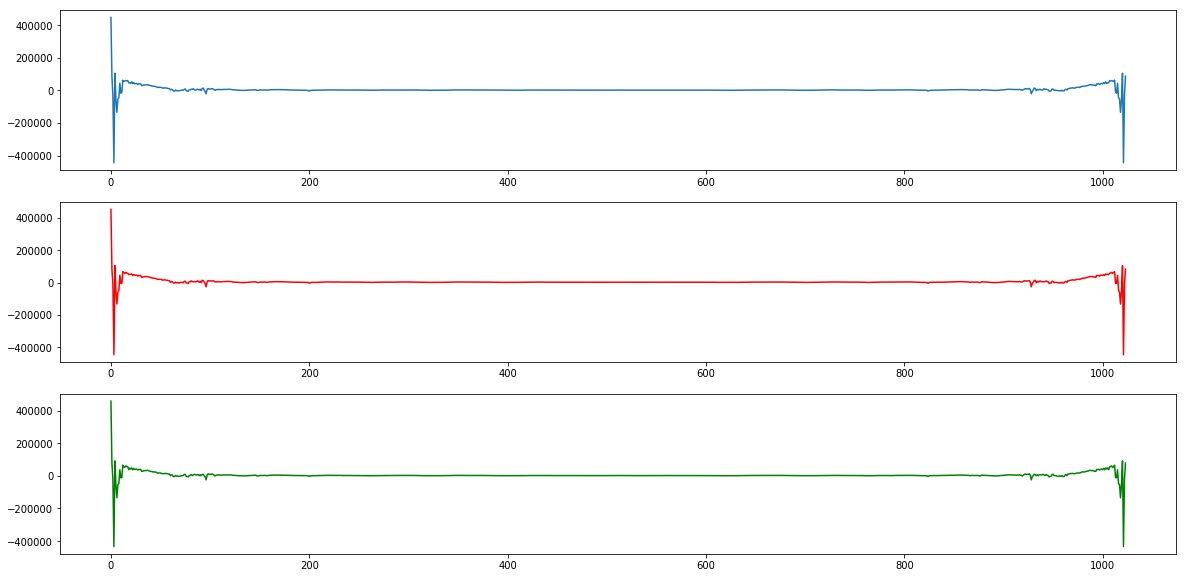

In [64]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot([i for i in range(1024)], data[1,:-1])
#plt.axis([0, 6, 0, 20])
plt.subplot(312)
plt.plot([i for i in range(1024)], data[2,:-1],color='r')
plt.subplot(313)
plt.plot([i for i in range(1024)], data[3,:-1],color='g')
plt.show()

# freq domain (fft after ratio)

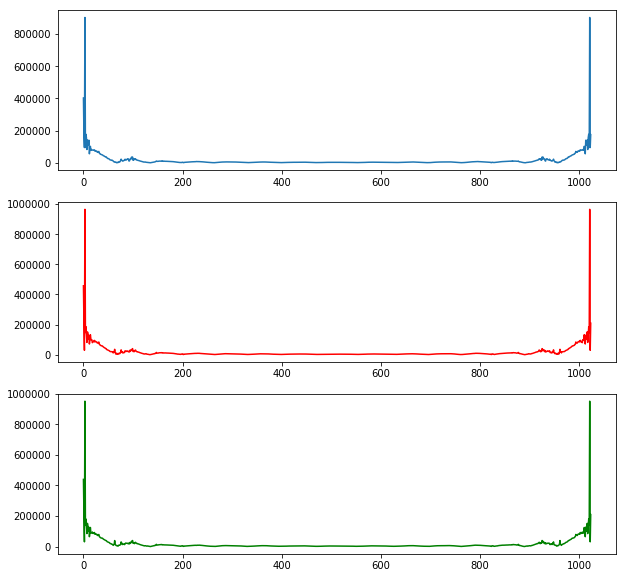

In [67]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot([i for i in range(1024)], data[1,:-1])
#plt.axis([0, 6, 0, 20])
plt.subplot(312)
plt.plot([i for i in range(1024)], data[2,:-1],color='r')
plt.subplot(313)
plt.plot([i for i in range(1024)], data[3,:-1],color='g')
plt.show()

In [ ]:
import scipy.io as sio
import numpy
Subjects = ['hassan','adeel1','Ameen1','amjad1','Arqam1','Asif1',\
            'Azaman1','bhatti1','faheem1','furkan1','george1','gohas1'\
            ,'grizwan1','hassan1','kashif1','naseem1','naveed1','peter1'\
            ,'rafiq1','rizwan1','sajjad1','sakim1','tariq1','umer1',\
            'usman1','waqas1','waqash1']
path= '/media/t-rex/F/fypp/FYP/All39Files/'
wj=0





FOR HASSAN WJ I & Q (SIZE is 100x1000) 


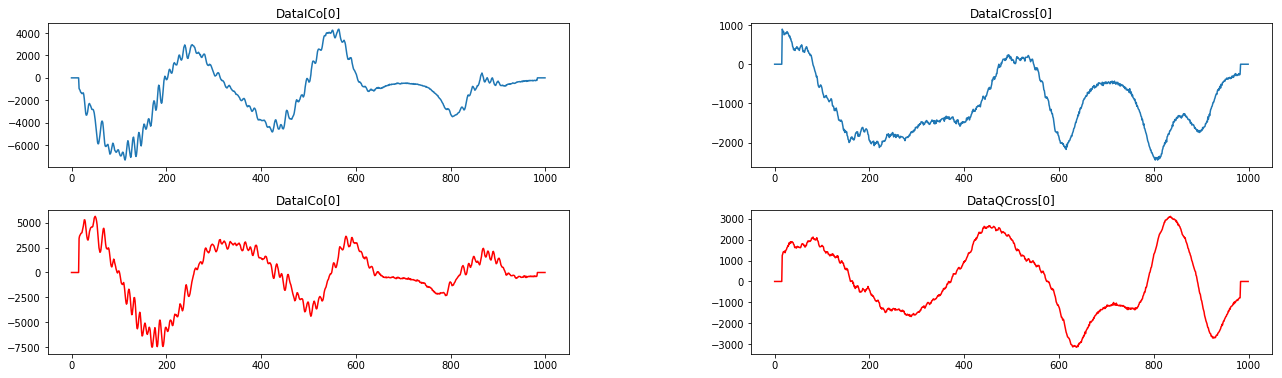

In [11]:
import scipy.io as sio
import numpy

path = '/media/t-rex/F/fypp/FYP/All39Files/';
ICopath = path + 'hassan_wj/ICo.mat'
ICrosspath = path + 'hassan_wj/ICross.mat'
QCopath = path + 'hassan_wj/QCo.mat'
QCrosspath = path + 'hassan_wj/QCross.mat'

DataICo= sio.loadmat(ICopath)
DataICross= sio.loadmat(ICrosspath)
DataQCo= sio.loadmat(QCopath)
DataQCross= sio.loadmat(QCrosspath)

DataICo= DataICo['DataICo']
DataICross= DataICross['DataICross']
DataQCo= DataQCo['DataQCo']
DataQCross= DataQCross['DataQCross']

# print DataICo.size
# print DataICross.size
# print DataQCo.size
# print DataQCross.size
import matplotlib.pyplot as plt
print "\n\n"
print "FOR HASSAN WJ I & Q (SIZE is 100x1000) "

plt.figure(figsize=(20,5))
plt.subplot(221)
plt.plot([i for i in range(1000)],DataICo[0])
plt.title('DataICo[0]')
plt.subplot(222)
plt.plot([i for i in range(1000)],DataICross[0])
plt.title('DataICross[0]')
plt.subplot(223)
plt.plot([i for i in range(1000)],DataQCo[0],'r')
plt.title('DataICo[0]')
plt.subplot(224)
plt.plot([i for i in range(1000)],DataQCross[0],'r')
plt.title('DataQCross[0]')

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)


# questions
1) We have Co & Cross for both I and Q feats. why? (total feature arrays 2->4)<br><br>
2) Each Co & Cross has dimension 100x1000,I_Co -> 100x1000, I_cross -> 100x1000, Q_Co -> 100x1000, Q_Cross -> 100x1000<br><br>
3) This brings total trainable dimensions to 
(2)x(27)x(4)x(100x1000) -> (wj/woj)x(totalSubjects)x(Co&Cross for I&Q)x(100x1000)<br>